In [0]:
import tensorflow.keras as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x_len = 800

In [0]:
global_x = 0

In [0]:
batch_size = 1
def dataGenerator(batch_size=batch_size):
  while True:
    x_batch = []
    y_batch = []
    global global_x 
    t = pd.read_csv("/content/drive/My Drive/internship/iiita/phase2/data2/"+str((global_x)%(x_len)+1)+".csv")
    t = t.values
    y_batch = t[:]
    x_batch = t[:1]
    x_batch = np.array(x_batch)
    y_batch = np.array(y_batch)
    global_x += batch_size
    y_batch = y_batch.reshape(1,64,12)
    yield (x_batch,y_batch)

In [0]:
from tensorflow.keras.regularizers import l2

In [6]:
LSTMmodel = tf.Sequential()
LSTMmodel.add(tf.layers.RepeatVector(64,input_shape=( 12,)))
LSTMmodel.add(tf.layers.LSTM(100,return_sequences=True))
LSTMmodel.add(tf.layers.Dense(100))
LSTMmodel.add(tf.layers.Dense(12,kernel_regularizer=l2(1e-3)))
LSTMmodel.compile(optimizer='adam', loss='mse')
LSTMmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector (RepeatVector) (None, 64, 12)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 100)           45200     
_________________________________________________________________
dense (Dense)                (None, 64, 100)           10100     
_________________________________________________________________
dense_1 (Dense)              (None, 64, 12)            1212      
Total params: 56,512
Trainable params: 56,512
Non-trainable params: 0
_________________________________________________________________


In [7]:
LSTMmodel.fit(dataGenerator(),steps_per_epoch=x_len/batch_size,epochs=20)

Epoch 1/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0189
Epoch 2/20
800/800 [==============================] - 9s 12ms/step - loss: 0.0033
Epoch 3/20
800/800 [==============================] - 9s 12ms/step - loss: 0.0022
Epoch 4/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0019
Epoch 5/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0017
Epoch 6/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0016
Epoch 7/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0015
Epoch 8/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0015
Epoch 9/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0014
Epoch 10/20
800/800 [==============================] - 9s 12ms/step - loss: 0.0013
Epoch 11/20
800/800 [==============================] - 10s 12ms/step - loss: 0.0013
Epoch 12/20
800/800 [==============================] - 9s 12ms/step - loss: 0.0012
Epoch

In [0]:
test = pd.read_csv("/content/drive/My Drive/internship/iiita/phase2/data2/812.csv")

In [9]:
test = test.values
te_  = test[0]
te_ = te_.reshape(1,12)
te_.shape

(1, 12)

In [0]:
pred = LSTMmodel.predict(te_)

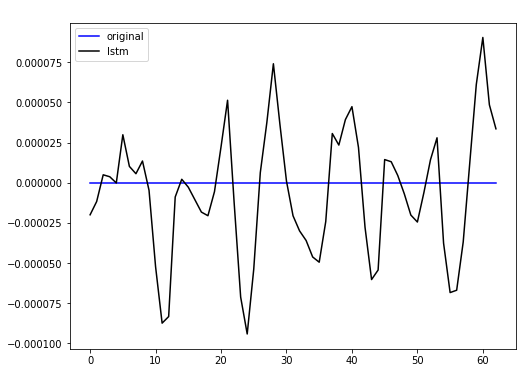

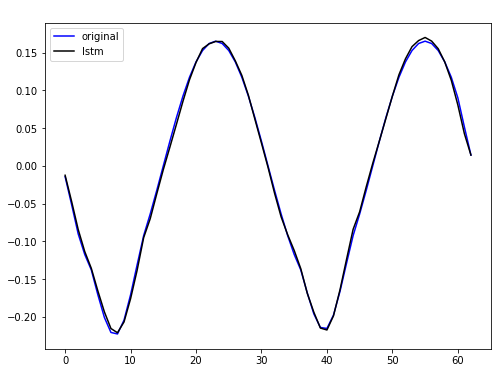

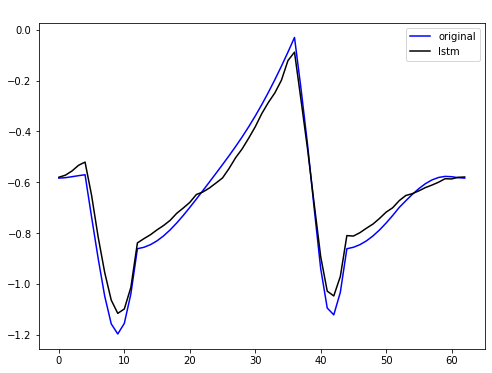

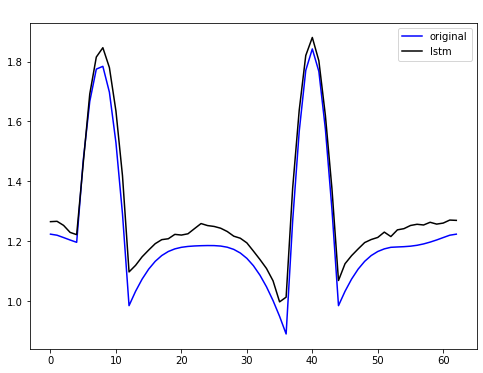

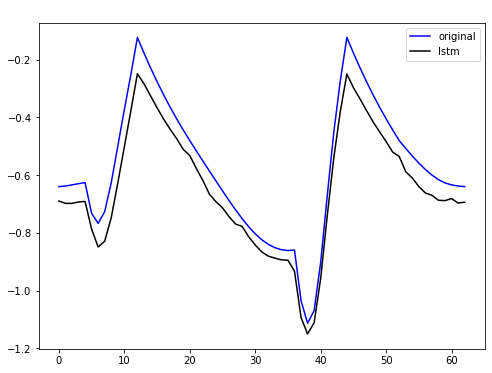

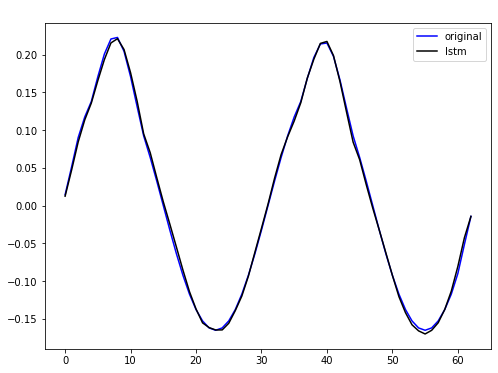

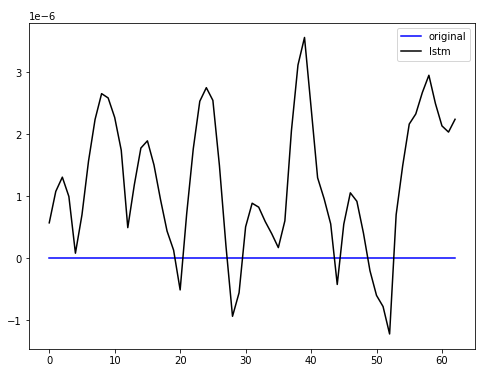

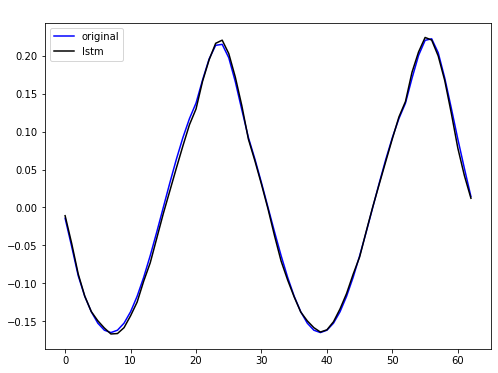

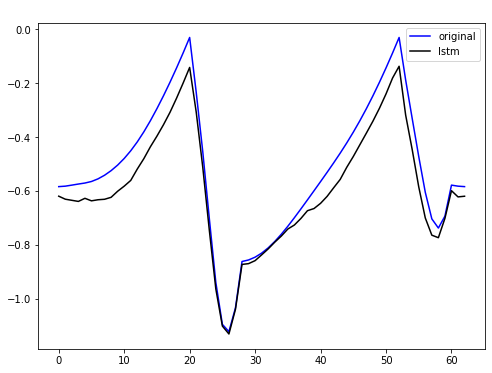

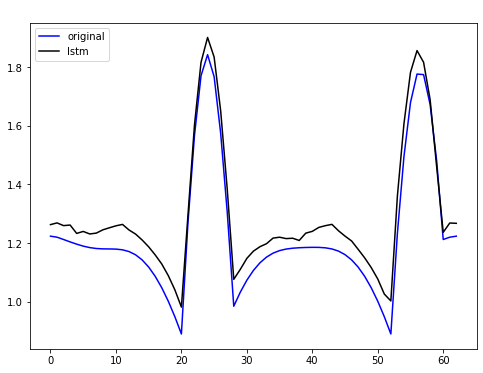

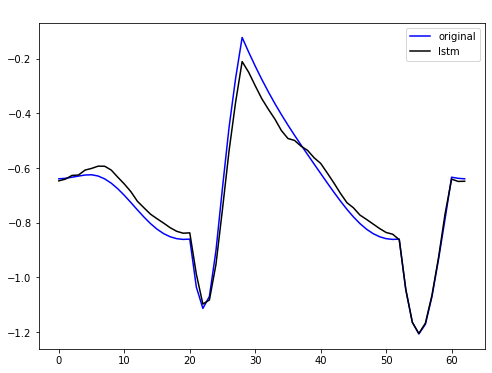

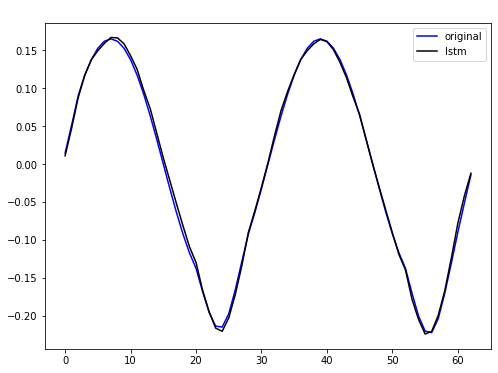

In [11]:
for a in range(12):
  o = []
  l = []
  for i in range(63):
    o.append(test[i][a])
    l.append(pred[0][i][a])
  f = plt.figure(figsize=(8, 6))
  plt.title("angle "+str(a),color='White')
  plt.plot(o, color='blue',label="original")
  plt.plot(l,color='black',label="lstm")
  plt.legend()
  f.show()

In [12]:
print(o)
print(l)

[0.0143262096873765, 0.05153102681061311, 0.09010765039237648, 0.11731002521459315, 0.13770126910073535, 0.15278000109928988, 0.16203116805900608, 0.16514867741462685, 0.16203116805900608, 0.15278000109928988, 0.13770126910073538, 0.11731002521459315, 0.09233176018074034, 0.0636942969070626, 0.03250360231635944, 2.0410779985789225e-17, -0.0325036023163594, -0.06369429690706258, -0.0923317601807403, -0.11731002521459312, -0.13770126910073535, -0.1683086631384256, -0.19598267793981308, -0.21397400868706906, -0.2152553518191324, -0.19762048619147612, -0.16601990718689566, -0.1287734709081647, -0.09233176018074034, -0.06369429690706259, -0.032503602316359376, 0.0, 0.032503602316359376, 0.06369429690706259, 0.09233176018074034, 0.11731002521459315, 0.13770126910073535, 0.15278000109928988, 0.16203116805900608, 0.16514867741462685, 0.16203116805900608, 0.15278000109928988, 0.13770126910073538, 0.11731002521459315, 0.09233176018074034, 0.0636942969070626, 0.03250360231635944, 2.04107799857892